# Counting Survivals From Titanic Data Using Logistic Regression

In [1]:
import matplotlib 
import sklearn
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic_data=pd.read_csv("C:/Users/sarka/Downloads/titanic.csv")
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:xlabel='survived', ylabel='count'>

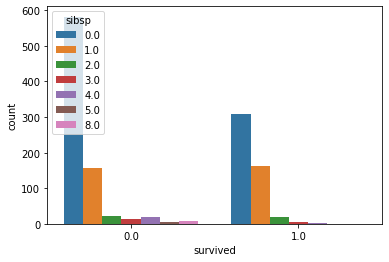

In [3]:
sns.countplot(x="survived",hue="sibsp",data=titanic_data)

In [4]:
titanic_data.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:>

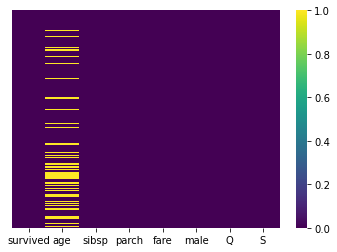

In [10]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap="viridis")


In [11]:
#dropping coloms which have null values

titanic_data=pd.read_csv("C:/Users/sarka/Downloads/titanic.csv")

emberk=pd.get_dummies(titanic_data["embarked"],drop_first=True)
female=pd.get_dummies(titanic_data["sex"],drop_first=True)

titanic_data=pd.concat([titanic_data,female,emberk],axis=1)

titanic_data.drop(['body','cabin','boat','home.dest','name','embarked','sex','pclass','ticket'],axis=1,inplace=True)



In [12]:
titanic_data.dropna(inplace=True)
titanic_data.head()

,survived,age,sibsp,parch,fare,male,Q,S
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1


In [13]:
X=titanic_data.drop(['survived'],axis=1);
Y=titanic_data['survived']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=model.predict(x_test)

report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       120
         1.0       0.67      0.63      0.65        89

    accuracy                           0.71       209
   macro avg       0.71      0.70      0.70       209
weighted avg       0.71      0.71      0.71       209

